In [1]:
import matplotlib.pyplot as plt
from maze import Maze, plot_action_values,plot_policy
import numpy as np

In [2]:
env = Maze()

In [3]:
action_values = np.zeros((5,5,4))

In [4]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

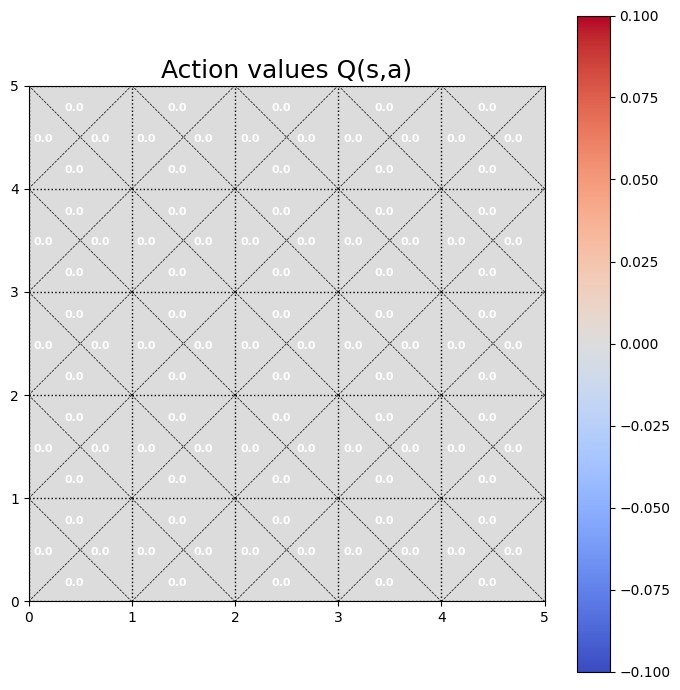

In [5]:
plot_action_values(action_values)

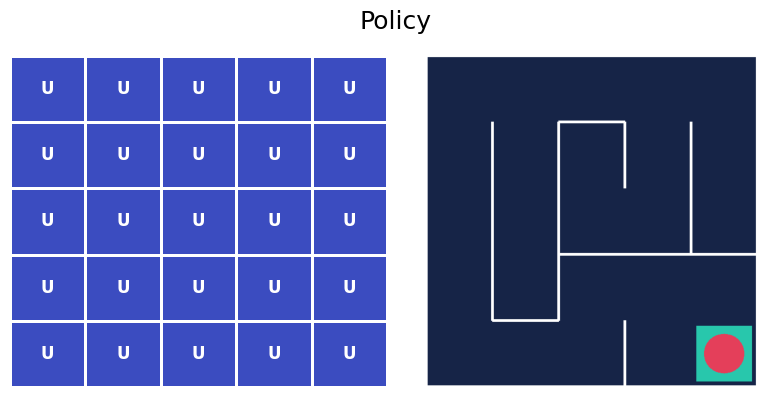

In [6]:
plot_policy(action_values, env.render(mode = 'rgb_array'))

In [20]:
def n_step_sarsa(action_values, policy, episodes, alpha = 0.1, gamma = 0.99, epsilon = 0.2, n = 8):
    for episode in range(episodes+1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []
        done = False
        t = 0 

        while t-n < len(transitions):
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])

            if t >= n:
                G = (1 - done) * action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma * G
                action_values[state_t][action_t] += alpha *(G - action_values[state_t][action_t])
            
            t+=1
            state = next_state
            action = next_action

In [21]:
n_step_sarsa(action_values, policy, 1000)

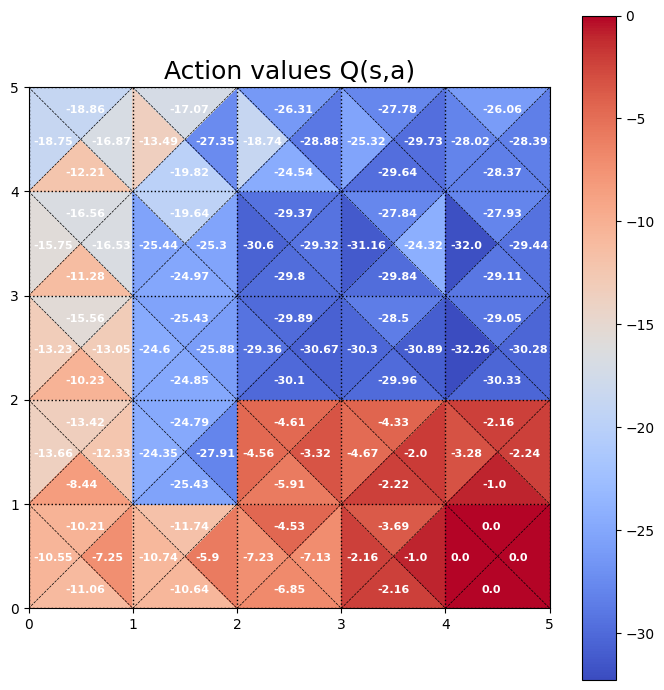

In [22]:
plot_action_values(action_values)

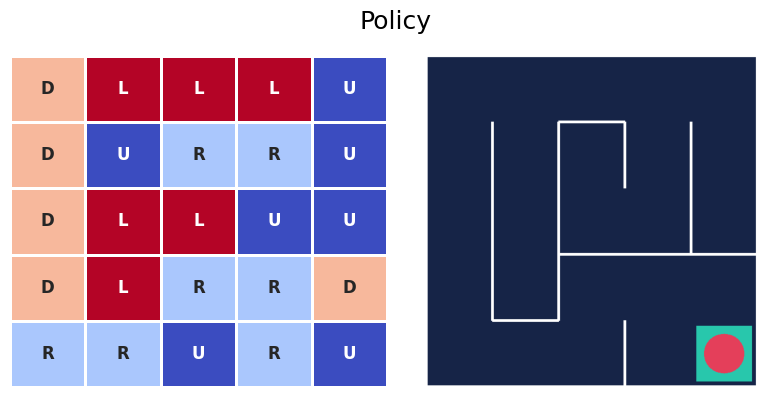

In [23]:
plot_policy(action_values, env.render(mode = 'rgb_array'))

In [24]:
test_agent(env, policy)

C:\Users\hebli\AppData\Local\Temp\ipykernel_12716\547560918.py:215: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use(orig_backend)
